# Appendix

In [46]:
from typing import NamedTuple

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so
import pandas as pd

# Loading and storing data values

# Spectronometer calibration curve calculations
Calibration = NamedTuple("Calibration", slope=float, intercept=float)
# Converts from absorbance to concentration in mg / mL
calibration = Calibration(slope=81.607231705, intercept=0.029639142857)

# Bead diameters
bead_diameter = (  # m
    4.493 * 0.001,
    2.632 * 0.001,
    3.505 * 0.001,
)

TARTRAZINE_MOLAR_MASS = 0.5343  # kg / mol
TARTRAZINE_DENSITY = 1930.0  # kg / m^3
TARTRAZINE_VOLUME = 1.0 * 1e-6 # m^3
TARTRAZINE_DIFFUSIVITY = 4.9e-10  # m^2 / s
SOLUTION_VOLUME = 100 * 1e-6  # m^3

# Absorption at 427nm wavelength
sample_times = ( # s
    np.array(
        [
            454,
            628,
            909,
            1244,
            1534,
            1868,
            2145,
            2465,
            2854,
            3070,
        ]
    ),
    np.array(
        [
            333,
            630,
            1020,
            1320,
            1620,
            1920,
            2235,
            2533,
            2841,
        ]
    ),
    np.array(
        [
            315,
            612,
            923,
            1212,
            1560,
            1800,
        ]
    ),
)

spectro_trials = (
    pd.read_excel("./Data/Lab3/Final/Bead1.xlsx", sheet_name=None),  # Bead 1
    pd.read_excel("./Data/Lab3/Final/Bead2.xlsx", sheet_name=None),  # Bead 2
    pd.read_excel("./Data/Lab3/Final/Bead3.xlsx", sheet_name=None),  # Bead 3
)

concentrations = (  # kg / m^3
    [],
    [],
    [],
)
for trial, data in enumerate(spectro_trials):
    for i, sample in enumerate(data.values()):
        # Get the maximum value of the abs(orbance)
        max_abs = sample["abs"].max()
        conc = (1 / calibration.slope) * (max_abs - calibration.intercept)
        concentrations[trial].append(conc)
concentrations = (
    np.array(concentrations[0]),
    np.array(concentrations[1]),
    np.array(concentrations[2]),
)

print(concentrations)


(array([0.00073965, 0.00086219, 0.00098473, 0.00110727, 0.00110727,
       0.00110727, 0.0012298 , 0.00135234, 0.00135234, 0.00135234]), array([0.00049457, 0.00061711, 0.00086219, 0.00086219, 0.00098473,
       0.00098473, 0.00159742, 0.00171996, 0.00171996]), array([0.00037204, 0.00049457, 0.00073965, 0.00073965, 0.00086219,
       0.00086219]))


0.30562000234461834
1.1490156454185313e-05
0.5957820504143857
4.36526212591157e-06
0.5113859115589585
4.449425971186136e-06


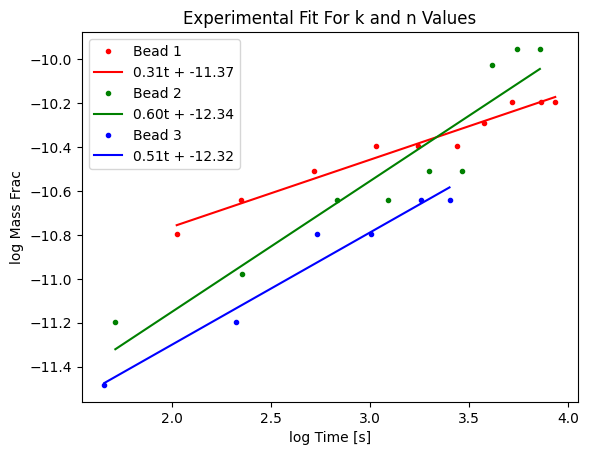

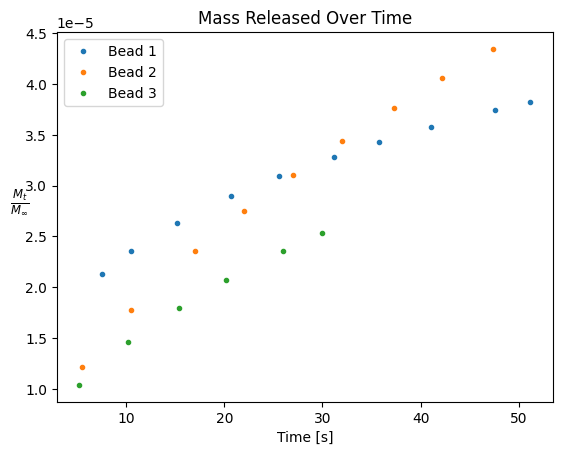

[array([2.04764478e-05, 2.38687865e-05, 2.72611253e-05, 3.06534641e-05,
       3.06534641e-05, 3.06534641e-05, 3.40458029e-05, 3.74381417e-05,
       3.74381417e-05, 3.74381417e-05]), array([1.36917702e-05, 1.70841090e-05, 2.38687865e-05, 2.38687865e-05,
       2.72611253e-05, 2.72611253e-05, 4.42228193e-05, 4.76151581e-05,
       4.76151581e-05]), array([1.02994314e-05, 1.36917702e-05, 2.04764478e-05, 2.04764478e-05,
       2.38687865e-05, 2.38687865e-05])]
[array([3.3923388e-06, 3.3923388e-06, 3.3923388e-06, 1.6961694e-06,
       0.0000000e+00, 1.6961694e-06, 3.3923388e-06, 1.6961694e-06,
       0.0000000e+00, 0.0000000e+00]), array([3.39233880e-06, 5.08850820e-06, 3.39233880e-06, 1.69616940e-06,
       1.69616940e-06, 8.48084699e-06, 1.01770164e-05, 1.69616940e-06,
       0.00000000e+00]), array([3.3923388e-06, 5.0885082e-06, 3.3923388e-06, 1.6961694e-06,
       1.6961694e-06, 0.0000000e+00])]
[array([1.94962000e-08, 1.49113793e-08, 1.10140870e-08, 5.42774208e-09,
       0.00000000e

In [47]:
time_masses = [
    TARTRAZINE_MOLAR_MASS * SOLUTION_VOLUME * conc for conc in concentrations
]

inf_mass = TARTRAZINE_DENSITY * TARTRAZINE_VOLUME

n_vals = np.zeros(3)
k_vals = np.zeros(3)
F = [mt/inf_mass for mt in time_masses]
def Fcalc(k, n , time):
    return k * (time ** n)

colors = ['r', 'g', 'b']
for i in range(3):
    time_mins = sample_times[i] * (1 / 60)
    log_time = np.log(time_mins)
    log_mass = np.log(time_masses[i] / inf_mass)
    slope, inter = np.polyfit(log_time, log_mass, 1)
    n_vals[i] = slope
    print(slope)
    print(np.exp(inter))
    k_vals[i] = np.exp(inter)
    plt.plot(log_time, log_mass, colors[i]+".", label=f"Bead {i+1}")
    plt.plot(log_time, slope * log_time + inter, colors[i]+"-" ,label=f"{slope:.2f}t + {inter:.2f}")
plt.title("Experimental Fit For k and n Values")
plt.xlabel("log Time [s]")
plt.ylabel("log Mass Frac")
plt.legend()
plt.show()

for i in range(3):
    time_mins = sample_times[i] * (1 / 60)
    plt.plot(time_mins, Fcalc(k_vals[i], n_vals[i], sample_times[i] * (1/60)) , ".", label=f"Bead {i+1}")


plt.xlabel("Time [s]")
plt.ylabel(r"$\frac{M_t}{M_\infty}$", rotation=0, fontdict={"size": 12})
plt.title("Mass Released Over Time")
plt.legend()
plt.show()
print(F)
print([np.gradient(F[i]) for i in range(3)])
dFdt = [np.gradient(F[i])/np.gradient(sample_times[i]) for i in range(3)]
print(dFdt)

1.1490156454185313e-05 
 0.30562000234461834


/tmp/ipykernel_22157/1162718564.py:2: RuntimeWarning: divide by zero encountered in power
  return k * n * (time ** (n - 1))


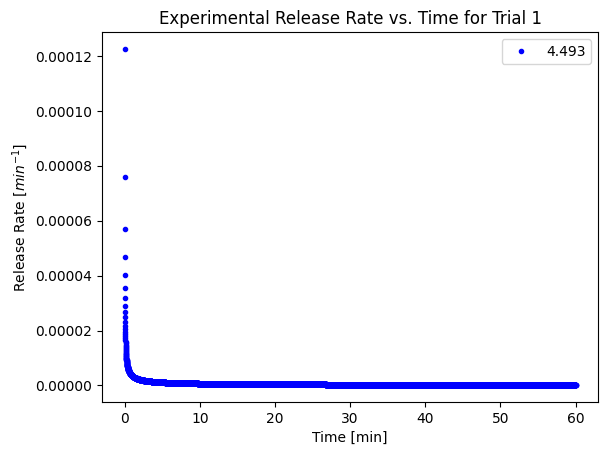

4.36526212591157e-06 
 0.5957820504143857


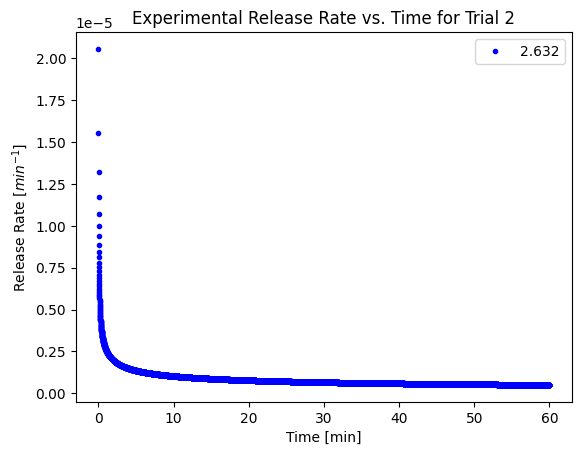

4.449425971186136e-06 
 0.5113859115589585


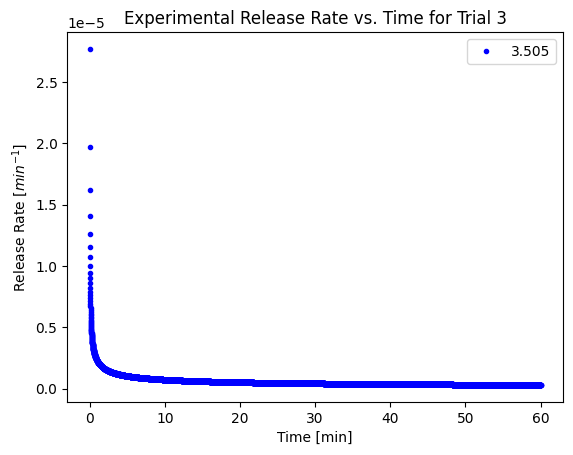

0.03335553655838699 
 0.43


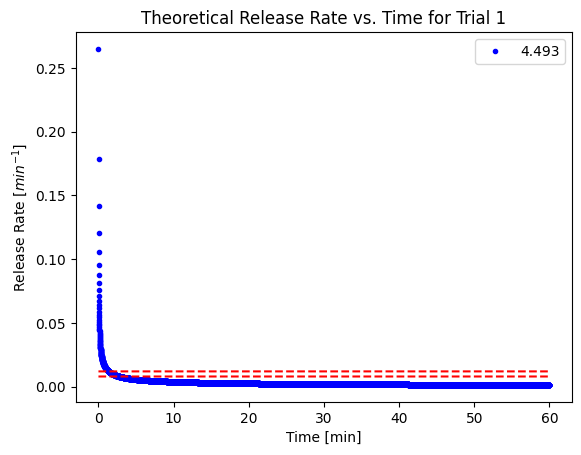

0.056940131366577794 
 0.43


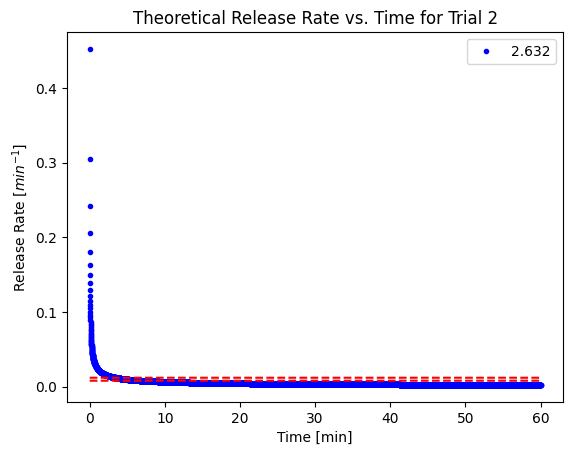

0.04275789607898225 
 0.43


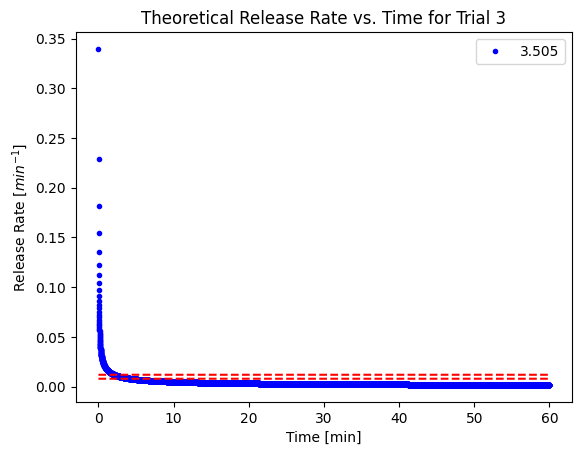

In [48]:
def deriv_F(k: float, n: float, time: np.ndarray) -> np.ndarray:
    return k * n * (time ** (n - 1))

def F(k: float, n: float, time: np.ndarray) -> np.ndarray:
    return 

n_theory = {"fick": 0.43, "poly": 0.85}

def k_theory(diff: float, rad: float) -> float:
    return 6 * np.sqrt(diff / (np.pi * rad ** 2))

times = np.linspace(0, 60, 10_000)
for i in range(3):
    dFdt = deriv_F(k_vals[i], n_vals[i], times)
    print(k_vals[i], "\n",n_vals[i])
    plt.plot(times, dFdt, "b.", label=f"{bead_diameter[i] * 1000}")
    plt.xlabel("Time [min]")
    plt.ylabel("Release Rate $[min^{-1}]$")
    plt.title(f"Experimental Release Rate vs. Time for Trial {i+1}")
    plt.legend()
    plt.show()

for i in range(3):
    n = n_theory["fick"]
    k = k_theory(TARTRAZINE_DIFFUSIVITY, bead_diameter[i] / 2)
    print(k,"\n",n)
    dFdt = deriv_F(k, n, times)
    plt.plot(times, dFdt, "b.", label=f"{bead_diameter[i] * 1000}")
    plt.plot(times, times*0 + 0.010-0.002, "r--")
    plt.plot(times, times*0 + 0.010+0.002, "r--")
    plt.xlabel("Time [min]")
    plt.ylabel("Release Rate $[min^{-1}]$")
    plt.title(f"Theoretical Release Rate vs. Time for Trial {i+1}")
    plt.legend()
    plt.show()
    


In [49]:
print(k_vals)
print(n_vals)

[1.14901565e-05 4.36526213e-06 4.44942597e-06]
[0.30562    0.59578205 0.51138591]
